Task 1: Linear Regression

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1.	Load and explore the data.

In [ ]:
df = pd.read_csv('/student_performance_multi.csv')

In [ ]:
df.head()

,Hours_Studied,Attendance_Rate,Sleep_Hours,Internet_Usage_Hours,Part_Time_Work,Exam_Score
0,3.745401,84.908086,5.110798,4.152654,0,64.155905
1,9.507143,76.804818,7.251406,3.833455,0,95.392727
2,7.319939,65.476381,9.237675,0.205137,1,87.753873
3,5.986585,90.689751,8.393349,2.729983,0,84.770357
4,1.560186,84.236559,8.839367,3.041565,0,56.499866


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hours_Studied         500 non-null    float64
 1   Attendance_Rate       500 non-null    float64
 2   Sleep_Hours           500 non-null    float64
 3   Internet_Usage_Hours  500 non-null    float64
 4   Part_Time_Work        500 non-null    int64  
 5   Exam_Score            500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [ ]:
df.describe()

,Hours_Studied,Attendance_Rate,Sleep_Hours,Internet_Usage_Hours,Part_Time_Work,Exam_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.985617,74.097570,7.105349,3.971812,0.286000,62.593704
std,2.986884,14.274673,1.783158,2.296079,0.452342,20.262039
min,0.050616,50.231601,4.029640,0.025746,0.000000,6.368249
25%,2.412797,61.454962,5.447368,1.928594,0.000000,46.980371
50%,5.131637,73.591078,7.238430,4.071131,0.000000,63.080967
75%,7.561249,86.316841,8.664063,5.899010,1.000000,77.417360
max,9.929648,99.985884,9.996482,7.986780,1.000000,100.000000


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance_Rate,0
Sleep_Hours,0
Internet_Usage_Hours,0
Part_Time_Work,0
Exam_Score,0


2.	Multiple linear regression model to predict Exam_Score.

In [ ]:
X = df[['Hours_Studied', 'Sleep_Hours']]
y = df['Exam_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

3.	Evaluate the model using MAE, MSE, and R² Score.

In [ ]:
print(f"\n---Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


---Model Evaluation ---
Mean Absolute Error (MAE): 10.92
Mean Squared Error (MSE): 176.93
R² Score: 0.55


4.	Plot actual vs predicted values.

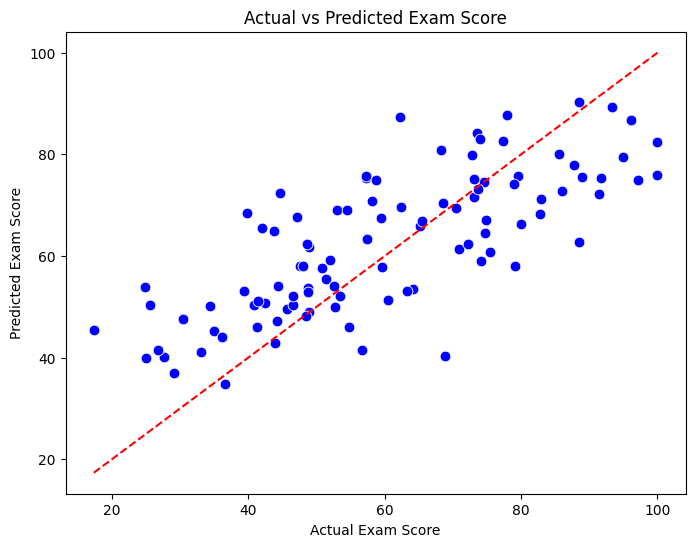

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Score')
plt.show()